In [1]:
# To supress warnings
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Basic Libraries for Data organization, Statistical operations and Plotting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For loading .arff files
from scipy.io import arff


# To analyze the type of missing data
import missingno as msno


# Library for performing k-NN imputations 
import fancyimpute

#Library for preprocessing
from sklearn.preprocessing import scale

#To perform kFold Cross Validation
from sklearn.model_selection import StratifiedKFold

# Library imbalanced-learn to deal with the data imbalance. To use SMOTE oversampling
from imblearn.over_sampling import SMOTE 

# Impoting classification models
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

#Evaluation of Model
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn.metrics import auc
from sklearn.model_selection import GridSearchCV




Using TensorFlow backend.


In [0]:
from google.colab import files
uploaded=files.upload()

Saving 1year.arff to 1year.arff
Saving 2year.arff to 2year.arff
Saving 3year.arff to 3year.arff
Saving 4year.arff to 4year.arff
Saving 5year.arff to 5year.arff


In [0]:
#Loading the Data

############################################################
# Loads the 5 raw .arff files into a list
def load_arff_raw_data():
    N=5
    return [arff.loadarff(str(i+1) + 'year.arff') for i in range(N)]

############################################################
# Loads the 5 raw .arff files into pandas dataframes
def load_dataframes():
    return [pd.DataFrame(data_i_year[0]) for data_i_year in load_arff_raw_data()]

############################################################
# Set the column headers from X1 ... X64 and the class label as Y, for all the 5 dataframes.
def set_new_headers(dataframes):
    cols = ['X' + str(i+1) for i in range(len(dataframes[0].columns)-1)]
    cols.append('Y')
    for df in dataframes:
        df.columns = cols

############################################################
# dataframes is the list of pandas dataframes for the 5 year datafiles.  
dataframes = load_dataframes()

# Set the new headers for the dataframes. The new headers will have the renamed set of feature (X1 to X64)
set_new_headers(dataframes)    

In [3]:
#Viewing the Data
#Print the Head & tail of record
dataframes[0].iloc[:,36]
#dataframes[0].tail()

#Describing the Data
for i in range(len(dataframes)):
  print(dataframes[i].describe())
  
#Getting Info about The data
for i in range(len(dataframes)):
  print(dataframes[i].info())
  
#Knowing the Dimensions
for i in range(len(dataframes)):
  print(dataframes[i].shape)


                X1           X2           X3           X4            X5  \
count  7024.000000  7024.000000  7024.000000  6997.000000  7.019000e+03   
mean      0.034660     0.560215     0.119969     2.629143 -2.631672e+02   
std       4.565504     5.350084     5.275459    13.257356  3.707460e+04   
min    -256.890000   -72.162000  -440.500000     0.000000 -2.722100e+06   
25%       0.021182     0.296678     0.026968     1.063100 -4.449800e+01   
50%       0.075802     0.482960     0.181275     1.502000 -5.373900e+00   
75%       0.160268     0.680233     0.362548     2.460700  3.777050e+01   
max      94.280000   441.500000     1.000000  1017.800000  9.909000e+05   

                X6           X7           X8           X9          X10  \
count  7024.000000  7024.000000  7002.000000  7026.000000  7024.000000   
mean      0.059712     0.313876     2.623996     5.552855     1.825832   
std       6.051113     8.353274    18.708327   101.995448    33.836452   
min    -397.890000  -189.560

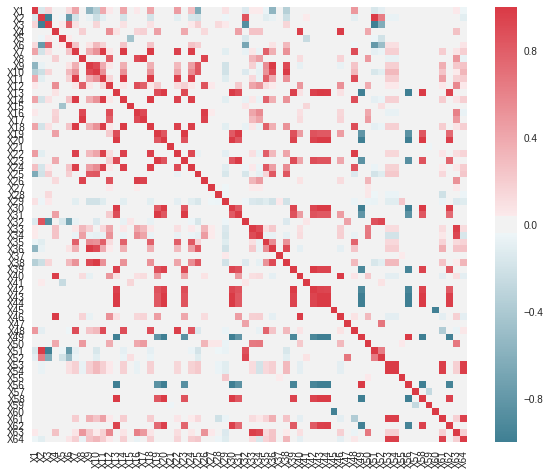

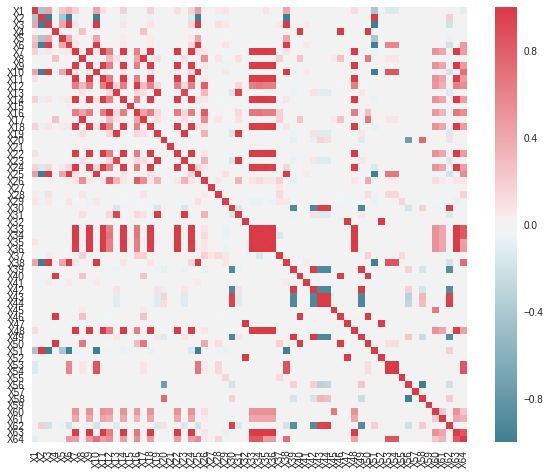

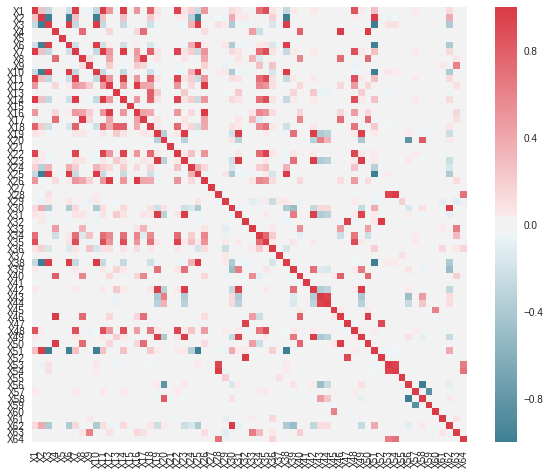

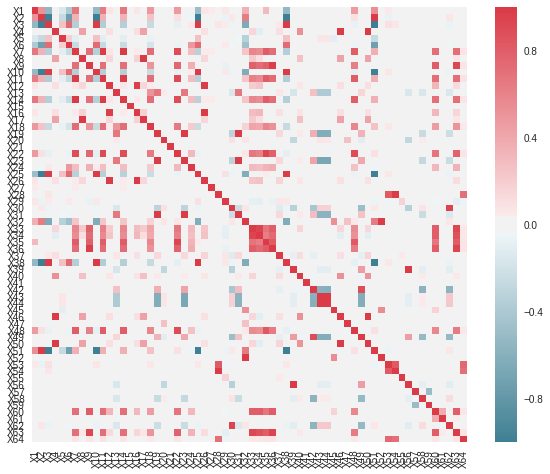

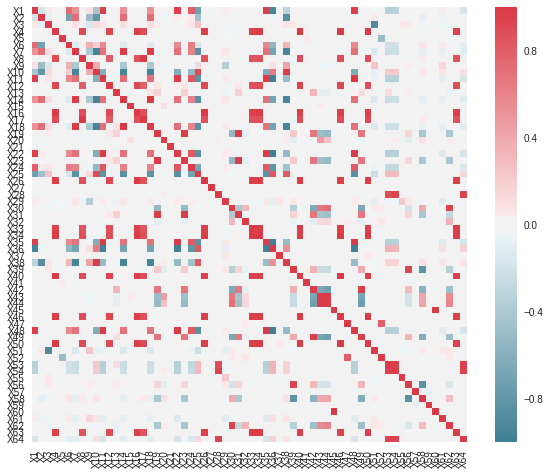

In [4]:
import seaborn as sns
#Viewing the Correlation among variables
for i in range(len(dataframes)):
  correlations = dataframes[i].corr()
  #print(correlations)
  f, ax = plt.subplots(figsize=(10, 8))
  sns.heatmap(correlations, mask=np.zeros_like(correlations, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, ax=ax)

In [5]:
#Converting the label into int
    for i in range(len(dataframes)):
        col = getattr(dataframes[i], 'Y')
        dataframes[i]['Y'] = col.astype(int)
        
#Checking the changed DataType
dataframes[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7027 entries, 0 to 7026
Data columns (total 65 columns):
X1     7024 non-null float64
X2     7024 non-null float64
X3     7024 non-null float64
X4     6997 non-null float64
X5     7019 non-null float64
X6     7024 non-null float64
X7     7024 non-null float64
X8     7002 non-null float64
X9     7026 non-null float64
X10    7024 non-null float64
X11    6988 non-null float64
X12    6997 non-null float64
X13    7027 non-null float64
X14    7024 non-null float64
X15    7025 non-null float64
X16    7002 non-null float64
X17    7002 non-null float64
X18    7024 non-null float64
X19    7027 non-null float64
X20    7027 non-null float64
X21    5405 non-null float64
X22    7024 non-null float64
X23    7027 non-null float64
X24    6903 non-null float64
X25    7024 non-null float64
X26    7002 non-null float64
X27    6716 non-null float64
X28    6993 non-null float64
X29    7024 non-null float64
X30    7027 non-null float64
X31    7027 non-null fl

In [6]:
#Viewing Statistically The Missing Data Individually
for i in range(len(dataframes)):
  print(dataframes[i].isnull().sum())

X1        3
X2        3
X3        3
X4       30
X5        8
X6        3
X7        3
X8       25
X9        1
X10       3
X11      39
X12      30
X13       0
X14       3
X15       2
X16      25
X17      25
X18       3
X19       0
X20       0
X21    1622
X22       3
X23       0
X24     124
X25       3
X26      25
X27     311
X28      34
X29       3
X30       0
       ... 
X36       3
X37    2740
X38       3
X39       0
X40      30
X41      84
X42       0
X43       0
X44       0
X45     134
X46      31
X47      29
X48       3
X49       0
X50      25
X51       3
X52      29
X53      34
X54      34
X55       0
X56       0
X57       1
X58       0
X59       1
X60     135
X61      22
X62       0
X63      30
X64      34
Y         0
Length: 65, dtype: int64
X1        1
X2        1
X3        1
X4       22
X5       24
X6        1
X7        1
X8       18
X9        4
X10       1
X11       1
X12      22
X13      63
X14       1
X15      12
X16      19
X17      18
X18       1
X19      64
X20      63
X21

In [7]:
#Seeing the Missing Data Overall
clean_dataframes = [df.dropna(axis=0, how='any') for df in dataframes]
for i in range(len(dataframes)):
   print(str(i+1)+'year:','Original Length=', len(dataframes[i]), '\tCleaned Length=', len(clean_dataframes[i]), '\tMissing Data=', len(dataframes[i])-len(clean_dataframes[i]))

1year: Original Length= 7027 	Cleaned Length= 3194 	Missing Data= 3833
2year: Original Length= 10173 	Cleaned Length= 4088 	Missing Data= 6085
3year: Original Length= 10503 	Cleaned Length= 4885 	Missing Data= 5618
4year: Original Length= 9792 	Cleaned Length= 4769 	Missing Data= 5023
5year: Original Length= 5910 	Cleaned Length= 3031 	Missing Data= 2879


In [8]:
#From above Graph we observed that x37 in each & every year has highest missing values ... So droping that column
for i in range(len(dataframes)):
  dataframes[i].drop('X37',axis = 1,inplace = True)
  
#Checking if column 37 is removed
for i in range(len(dataframes)):
  print(list(dataframes[i]))

['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'Y']
['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'Y']
['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',

In [10]:
#Knn Imputation
def perform_knn_imputation(dfs):
  knn_data =[]
  for i in range(len(dfs)):
    knn_impute = fancyimpute.KNN(k=100).fit_transform(dfs[i])
    knn_data.append(pd.DataFrame(knn_impute))   
  return knn_data

knndata = perform_knn_imputation(dataframes)



Imputing row 1/7027 with 0 missing, elapsed time: 25.578
Imputing row 101/7027 with 0 missing, elapsed time: 25.582
Imputing row 201/7027 with 1 missing, elapsed time: 25.587
Imputing row 301/7027 with 0 missing, elapsed time: 25.591
Imputing row 401/7027 with 0 missing, elapsed time: 25.594
Imputing row 501/7027 with 0 missing, elapsed time: 25.596
Imputing row 601/7027 with 0 missing, elapsed time: 25.599
Imputing row 701/7027 with 0 missing, elapsed time: 25.602
Imputing row 801/7027 with 0 missing, elapsed time: 25.604
Imputing row 901/7027 with 0 missing, elapsed time: 25.606
Imputing row 1001/7027 with 0 missing, elapsed time: 25.609
Imputing row 1101/7027 with 1 missing, elapsed time: 25.611
Imputing row 1201/7027 with 2 missing, elapsed time: 25.614
Imputing row 1301/7027 with 0 missing, elapsed time: 25.616
Imputing row 1401/7027 with 0 missing, elapsed time: 25.618
Imputing row 1501/7027 with 1 missing, elapsed time: 25.621
Imputing row 1601/7027 with 0 missing, elapsed time:

In [11]:
print(type(knndata))
print(type(knndata[0]))
knndata[0].isnull().sum()

<class 'list'>
<class 'pandas.core.frame.DataFrame'>


0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
     ..
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
54    0
55    0
56    0
57    0
58    0
59    0
60    0
61    0
62    0
63    0
Length: 64, dtype: int64

In [12]:
# Set the column headers from X1 ... X64 and the class label as Y, for all the 5 dataframes skipping col 37
def set_new_headers1(dataframes):
  cols=[]
  for i in range(len(dataframes.columns)):
    if i == 36:
      continue
    cols.append('X' + str(i+1))
  cols.append('Y')
  #print(cols)
  dataframes.columns = cols

############################################################
# Set the new headers for the dataframe 

for i in range(0,5):
  set_new_headers1(knndata[i])
  print(knndata[i])

  


            X1        X2        X3         X4        X5        X6        X7  \
0     0.200550  0.379510  0.396410    2.04720   32.3510  0.388250  0.249760   
1     0.209120  0.499880  0.472250    1.94470   14.7860  0.000000  0.258340   
2     0.248660  0.695920  0.267130    1.55480   -1.1523  0.000000  0.309060   
3     0.081483  0.307340  0.458790    2.49280   51.9520  0.149880  0.092704   
4     0.187320  0.613230  0.229600    1.40630   -7.3128  0.187320  0.187320   
5     0.228220  0.497940  0.359690    1.75020  -47.7170  0.000000  0.281390   
6     0.111090  0.647440  0.289710    1.47050    2.5349  0.000000  0.111090   
7     0.532320  0.027059  0.705540   53.95400  299.5800  0.000000  0.652400   
8     0.009020  0.632020  0.053735    1.12630  -37.8420  0.000000  0.014434   
9     0.124080  0.838370  0.142040    1.16940  -91.8830  0.000000  0.153280   
10    0.240010  0.443550  0.188350    1.44000  -21.1650 -0.931900  0.240010   
11   -0.027117  0.111480  0.119890    2.07540  -31.6

In [12]:
#Feature Selection using XBGClassifier Model
from sklearn.feature_selection import RFE
model =XGBClassifier()
x = knndata[0].iloc[:,0:63]
y = knndata[0].iloc[:,63]
rfe = RFE(model, 25)
fit = rfe.fit(x, y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 25
Selected Features: [False False False False  True False False False  True False False False
  True False False False False False  True  True  True False False  True
  True  True  True False  True  True False False  True  True  True False
  True False  True  True False False  True  True  True False  True False
 False  True False False False False False  True  True False False False
 False False False]
Feature Ranking: [21 33 31 22  1 15 12 37  1 25 14 26  1 35  5 18 34 36  1  1  1  2 13  1
  1  1  1 11  1  1 32 10  1  1  1  9  1  6  1  1 28 20  1  1  1  3  1  4
 17  1 39 16 30  8  7  1  1 23 24 19 27 38 29]


In [0]:

# Logistic Regression classifier
lr_classifier = LogisticRegression(penalty = 'l1', random_state = 0)

# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators = 5, criterion = 'entropy')

# eXtreme Gradient Boosting Classifier (XGBClassifier)
xgb_classifier = XGBClassifier()

# SVM Claasifier
svm_classifier = SVC()

In [14]:

#Solving the class Imbalance Problem
def check_data_imbalance(dfs):
    for i in range(len(dfs)):
        print('Dataset: '+str(i+1)+'year')
        print(dfs[i].groupby('Y').size())
        minority_percent = (dfs[i]['Y'].tolist().count(1) / len(dfs[i]['Y'].tolist()))*100
        print('Minority (label 1) percentage: '+  str(minority_percent) + '%')
        print('-'*64)
        
check_data_imbalance(dataframes)

Dataset: 1year
Y
0    6756
1     271
dtype: int64
Minority (label 1) percentage: 3.856553294435748%
----------------------------------------------------------------
Dataset: 2year
Y
0    9773
1     400
dtype: int64
Minority (label 1) percentage: 3.931976801336872%
----------------------------------------------------------------
Dataset: 3year
Y
0    10008
1      495
dtype: int64
Minority (label 1) percentage: 4.712939160239932%
----------------------------------------------------------------
Dataset: 4year
Y
0    9277
1     515
dtype: int64
Minority (label 1) percentage: 5.259395424836601%
----------------------------------------------------------------
Dataset: 5year
Y
0    5500
1     410
dtype: int64
Minority (label 1) percentage: 6.937394247038917%
----------------------------------------------------------------


Year1


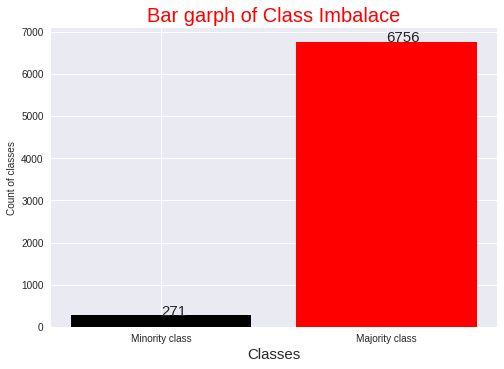

Year2


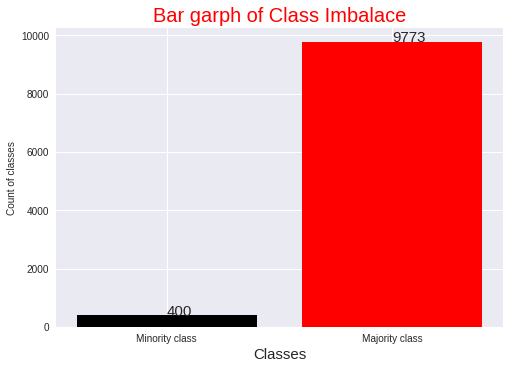

Year3


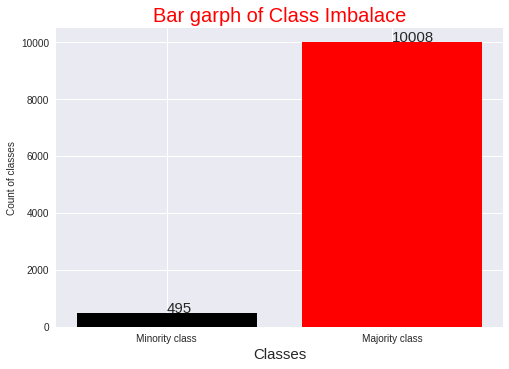

Year4


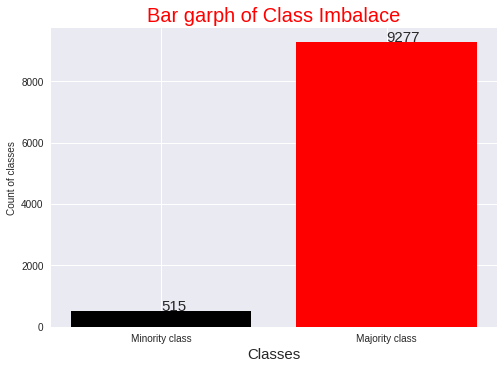

Year5


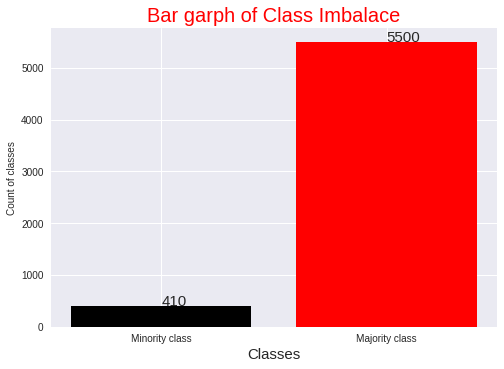

In [15]:
#visualizing the imbalanced data
visual_mcl=[ ]
visual_maj=[ ]
def check_data_imbalance(dfs):
    for i in range(len(dfs)):
        visual_mcl.append(dfs[i]['Y'].tolist().count(1))
        visual_maj.append(len(dfs[i]['Y'].tolist())-dfs[i]['Y'].tolist().count(1))
check_data_imbalance(dataframes)


for i in range(0,5):
    xvalues=['Minority class','Majority class']
    yvalues=[visual_mcl[i],visual_maj[i]]
    plt.bar(xvalues,yvalues,color=['k','r'])
    plt.xlabel('Classes',fontsize=15)
    plt.ylabel('Count of classes',fontsize=10)  
    plt.title('Bar garph of Class Imbalace',fontsize=20,color='R')
    for x,y in zip(xvalues,yvalues):
        plt.text(x,y,y,fontsize=15)
    print("Year"+str(i+1))
    plt.show()

In [0]:
def set_new_headers_train(dataframes):
  cols=[]
  H=[5,7,8,9,11,12,24,25,27,28,29,30,33,34,38,39,40,41,44,46,48,55,58,60,61]
  for i in range(0,len(H)):
    #print(i)
    cols.append('X' + str(H[i]))
  #print(cols)
  dataframes.columns = cols
        
def set_new_headers_test(dataframes):
    cols = ['Y']
    dataframes.columns = cols


In [22]:
#del set_new_headers()
# K fold and halding the imbalanced data using smote

A=['X5','X7','X8','X9','X11','X12','X24','X25','X27','X28','X29','X30','X33','X34','X38','X39','X40','X41','X44','X46','X48','X55','X58','X60','X61']
X = knndata[0].loc[:,A]
X = X.values
y = knndata[0].iloc[:,63]
y = y.values


n_measures = 3
s =(5,n_measures)

scores = np.zeros(s)

print(scores[0,0])

kf = StratifiedKFold(n_splits= 5) #Stratified because we need balanced samples
kf.get_n_splits(X)

cnt=0
acc=0
for train_index, test_index in kf.split(X,y):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  x_train = pd.DataFrame(X_train)
  #print(x_train.info)
  # print(dataframes[i].isnull().sum())
  
  sm = SMOTE(ratio='auto' , random_state=42, k_neighbors=10)
  x_train_res, y_train_res = sm.fit_sample(X_train, y_train)
  
  x_train_res = pd.DataFrame(x_train_res)
  y_train_res = pd.DataFrame(y_train_res)
  X_test=pd.DataFrame(X_test)
  y_test=pd.DataFrame(y_test)
  
  
  set_new_headers_train(x_train_res)
  set_new_headers_test(y_train_res)
  set_new_headers_train(X_test)
  set_new_headers_test(y_test)
  
  
  xgb_classifier.fit(x_train_res,y_train_res)
  y_pred = xgb_classifier.predict(X_test)
  
  

  scores[cnt,0] = recall_score(y_test, y_pred)
  scores[cnt,1] = accuracy_score(y_test, y_pred)
  scores[cnt,2] = precision_score(y_test, y_pred)
  cnt=cnt+1

print(scores)
#print(type(x_train_res))

0.0
TRAIN: [1352 1353 1354 ... 7024 7025 7026] TEST: [   0    1    2 ... 6808 6809 6810]
TRAIN: [   0    1    2 ... 7024 7025 7026] TEST: [1352 1353 1354 ... 6862 6863 6864]
TRAIN: [   0    1    2 ... 7024 7025 7026] TEST: [2703 2704 2705 ... 6916 6917 6918]
TRAIN: [   0    1    2 ... 7024 7025 7026] TEST: [4054 4055 4056 ... 6970 6971 6972]
TRAIN: [   0    1    2 ... 6970 6971 6972] TEST: [5405 5406 5407 ... 7024 7025 7026]
[[0.58181818 0.87277896 0.17021277]
 [0.61111111 0.83629893 0.13636364]
 [0.68518519 0.85053381 0.16086957]
 [0.72222222 0.86975089 0.1884058 ]
 [0.61111111 0.8569395  0.15492958]]


In [24]:
for i in range(0,5):
  x = knndata[i].loc[:,A]
  y= knndata[i].iloc[:,63]
  pred=xgb_classifier.predict(x)
  print("Results for Year %d"%(i+1))
  print("Accuracy is for year %d is"%(i+1))
  print(accuracy_score(y, pred))
  
  print("Recall is for year %d is"%(i+1))
  print(recall_score(y, pred))
  
  print("Precision is for year %d is "%(i+1))
  print(precision_score(y, pred))
  
  #print(classification_report(y, pred))
  print("Confusion matrix for Year %d is"%(i+1))
  print(confusion_matrix(y, pred))
  print('\n'+'\n')


Results for Year 1
Accuracy is for year 1 is
0.8988188416109293
Recall is for year 1 is
0.8376383763837638
Precision is for year 1 is 
0.2539149888143177
Confusion matrix for Year 1 is
[[6089  667]
 [  44  227]]



Results for Year 2
Accuracy is for year 2 is
0.8323994888430158
Recall is for year 2 is
0.6775
Precision is for year 2 is 
0.14672441797509475
Confusion matrix for Year 2 is
[[8197 1576]
 [ 129  271]]



Results for Year 3
Accuracy is for year 3 is
0.8529943825573646
Recall is for year 3 is
0.5575757575757576
Precision is for year 3 is 
0.17239225484072454
Confusion matrix for Year 3 is
[[8683 1325]
 [ 219  276]]



Results for Year 4
Accuracy is for year 4 is
0.858047385620915
Recall is for year 4 is
0.6077669902912621
Precision is for year 4 is 
0.20852764823451034
Confusion matrix for Year 4 is
[[8089 1188]
 [ 202  313]]



Results for Year 5
Accuracy is for year 5 is
0.8631133671742809
Recall is for year 5 is
0.5414634146341464
Precision is for year 5 is 
0.2633451957295